Загружаем датасет

In [389]:
import pandas as pd

In [390]:
df = pd.read_csv("books.csv")
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.;;;
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.;;;
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic;;;
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.;;;
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic;;;


In [391]:
print(df.shape, df.size, sep="\n")

(11127, 12)
133524


Получим типы данных, хранящихся в датасете.

In [392]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher;;;           object
dtype: object

Посмотрим, есть ли пустые ячейки в датасете.

In [393]:
cols = list(df.columns)
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'bookID': 0,
 'title': 0,
 'authors': 0,
 'average_rating': 0,
 'isbn': 0,
 'isbn13': 0,
 'language_code': 0,
 'num_pages': 0,
 'ratings_count': 0,
 'text_reviews_count': 0,
 'publication_date': 0,
 'publisher;;;': 0}

Видим, что в датасете нет пустых ячеек, поэтому, в принципе, можно работать со всеми столбцами.

In [394]:
rating_stat = {"min": df["average_rating"].min(),
            "max": df["average_rating"].max(),
            "mean": df["average_rating"].mean(),
            "median": df["average_rating"].median(),
            "mode": df["average_rating"].mode().to_list(),
            "var": df["average_rating"].var(ddof=0),
            "std": df["average_rating"].std(ddof=0),
            "range": df["average_rating"].max() - df["average_rating"].min(),
            "interquartile_range": df["average_rating"].quantile(0.75) - df["average_rating"].quantile(0.25),
            "skew": df["average_rating"].skew()
            }
rating_stat

{'min': 0.0,
 'max': 5.0,
 'mean': 3.9336308079446387,
 'median': 3.96,
 'mode': [4.0],
 'var': 0.12420633731994578,
 'std': 0.3524291947610836,
 'range': 5.0,
 'interquartile_range': 0.36499999999999977,
 'skew': -3.638311410554902}

Построим график распределения количества оценок по каждому имеющемуся значению оценки.

In [395]:
rating_data = {rating: df["average_rating"].to_list().count(rating) for rating in set(df["average_rating"])}
#rating_data

In [396]:
import matplotlib.pyplot as plt

In [397]:
rating_df = pd.DataFrame.from_dict(data=rating_data, orient="index", columns=["Rating for All Books"]).sort_index()
# rating_df.head()

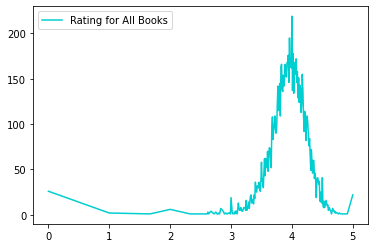

In [398]:
rating_df.plot(c="darkturquoise");

Из графика можем наблюдать, что большинство книг имеют оценки, близкие к 4.

Посмотрим, как колеблется число оценок в группе интерквартильного размаха.

In [399]:
q1 = df["average_rating"].quantile(0.25)
q2 = df["average_rating"].quantile(0.5)
q3 = df["average_rating"].quantile(0.75)

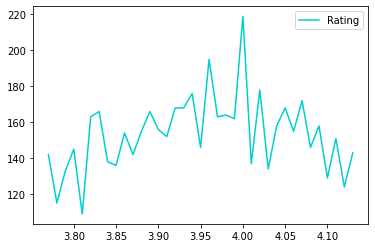

In [400]:
df_inter = df.query("@q1 <= average_rating <= @q3")
inter_rating = pd.DataFrame.from_dict(data={average_rating: df_inter["average_rating"].to_list().count(average_rating) for average_rating in set(df_inter["average_rating"])},
                                   orient="index", 
                                   columns=["Rating"]).sort_index()
inter_rating.plot(c="darkturquoise");

Теперь рассмотрим, как соотносится число книг, написанных некоторыми авторами.

In [401]:
authors_data = {}
for authors in df["authors"]:
    authors_list = authors.split("/")
    for auth in authors_list:
        authors_data[auth] = 0
for authors in df["authors"]:
    authors_list = authors.split("/")
    for auth in authors_list:
        authors_data[auth] += 1
# authors_data = {name: df["authors"].to_list().count(name) for name in df["authors"].unique()}

authors_df = pd.DataFrame.from_dict(authors_data, orient='index', columns=["Books"])
authors_df

,Books
J.K. Rowling,25
Mary GrandPré,6
W. Frederick Zimmerman,2
Douglas Adams,19
Stephen Fry,1
...,...
Margarita E. Valdes,1
Gemma Gallart,1
Ana Falcão Bastos,6
Larry McCaffery,1


Рассмотрим, какие авторы имеют больше 40 книг в данном датасете.

In [402]:
authors_stat = {}
for key in authors_data.keys():
    if authors_data[key] > 40:
        authors_stat[key] = authors_data[key]
authors_data1=pd.DataFrame.from_dict(authors_stat, orient='index', columns=[''])

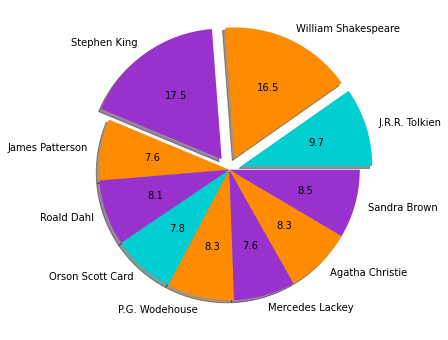

In [403]:
authors_data1.plot.pie(subplots=True, legend=False,
                       autopct="%.1f",
                       colors=["darkturquoise", "darkorange", "darkorchid", "darkorange", "darkorchid"],
                       fontsize=10,
                       explode=(0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0),
                       shadow = True,
                       figsize=(6, 6));

Из диаграммы видно, что больше всего книг в данном датасете имеют Stephen King, William Shakespeare и J.R.R. Tolkein. Рассмотрим, какие оценки имеют их произведения.

In [404]:
SK_df = df[df['authors'].str.contains('Stephen King')]
WS_df = df[df["authors"].str.contains('William Shakespeare')]
JT_df = df[df["authors"].str.contains('J.R.R. Tolkien')]

In [405]:
range0_1 = {'Stephen King':0, 'William Shakespeare':0, 'J.R.R. Tolkien':0}
range1_2 = {'Stephen King':0, 'William Shakespeare':0, 'J.R.R. Tolkien':0}
range2_3 = {'Stephen King':0, 'William Shakespeare':0, 'J.R.R. Tolkien':0}
range3_4 = {'Stephen King':0, 'William Shakespeare':0, 'J.R.R. Tolkien':0}
range4_5 = {'Stephen King':0, 'William Shakespeare':0, 'J.R.R. Tolkien':0}

In [406]:
for i in SK_df["average_rating"]:
    if (i >= 0) & (i < 1):
        range0_1['Stephen King'] += 1
    elif (i >= 1) & (i < 2):
        range1_2['Stephen King'] += 1
    elif (i >= 2) & (i < 3):
        range2_3['Stephen King'] += 1
    elif (i >= 3) & (i < 4):
        range3_4['Stephen King'] += 1
    elif (i >= 4) & (i <= 5):
        range4_5['Stephen King'] += 1

In [407]:
for i in WS_df["average_rating"]:
    if (i >= 0) & (i < 1):
        range0_1['William Shakespeare'] += 1
    elif (i >= 1) & (i < 2):
        range1_2['William Shakespeare'] += 1
    elif (i >= 2) & (i < 3):
        range2_3['William Shakespeare'] += 1
    elif (i >= 3) & (i < 4):
        range3_4['William Shakespeare'] += 1
    elif (i >= 4) & (i <= 5):
        range4_5['William Shakespeare'] += 1

In [408]:
for i in JT_df["average_rating"]:
    if (i >= 0) & (i < 1):
        range0_1['J.R.R. Tolkien'] += 1
    elif (i >= 1) & (i < 2):
        range1_2['J.R.R. Tolkien'] += 1
    elif (i >= 2) & (i < 3):
        range2_3['J.R.R. Tolkien'] += 1
    elif (i >= 3) & (i < 4):
        range3_4['J.R.R. Tolkien'] += 1
    elif (i >= 4) & (i <= 5):
        range4_5['J.R.R. Tolkien'] += 1

In [409]:
top_auth = pd.DataFrame.from_dict(data=range0_1, orient='index', columns=["Rated 0-1"])
top_1 = pd.DataFrame.from_dict(data=range1_2, orient='index', columns=["Rated 1-2"])
top_2 = pd.DataFrame.from_dict(data=range2_3, orient='index', columns=["Rated 2-3"])
top_3 = pd.DataFrame.from_dict(data=range3_4, orient='index', columns=["Rated 3-4"])
top_4 = pd.DataFrame.from_dict(data=range4_5, orient='index', columns=["Rated 4-5"])

top_auth = top_auth.merge(top_1, left_index=True, right_index=True)
top_auth = top_auth.merge(top_2, left_index=True, right_index=True)
top_auth = top_auth.merge(top_3, left_index=True, right_index=True)
top_auth = top_auth.merge(top_4, left_index=True, right_index=True)
top_auth

,Rated 0-1,Rated 1-2,Rated 2-3,Rated 3-4,Rated 4-5
Stephen King,0,0,0,44,55
William Shakespeare,0,0,0,68,25
J.R.R. Tolkien,0,0,0,15,40


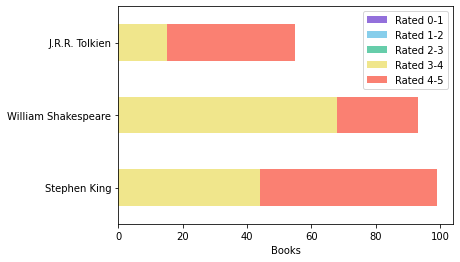

In [410]:
ax = top_auth.plot.barh(color=["mediumpurple", "skyblue", "mediumaquamarine", "khaki", "salmon"],
                       stacked=True);
ax.set_xlabel("Books");

Из графика видно, что книги Stephen King, William Shakespeare и J.R.R. Tolkien имеют только оценки, превышающее значение 3.

Расмотрим, например, какие издательства выпустили свыше 100 книг из данного датасета.

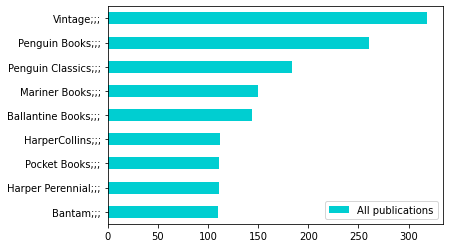

In [411]:
publ_data = {name: df["publisher;;;"].to_list().count(name) for name in df["publisher;;;"].unique()}
publ_stat = {}
for key in publ_data.keys():
    if publ_data[key] > 100:
        publ_stat[key] = publ_data[key]
publ_df = pd.DataFrame.from_dict(publ_stat, orient='index', columns=["All publications"]).sort_values(by=['All publications'], ascending=True)
publ_df.plot.barh(color="darkturquoise");


Теперь рассмотрим, какое же соотношение среди языков, на которых были написаны книги. Но будем отбирать языки, которые были использованы в 30 и более книгах.

In [412]:
lang_data = {name: df["language_code"].to_list().count(name) for name in df["language_code"].unique()}
lang_df = pd.DataFrame.from_dict(lang_data, orient='index')
# lang_data

In [413]:
lang_stat = {'others': 0}
for key in lang_data.keys():
    if lang_data[key] > 100:
        lang_stat[key] = lang_data[key]
    else:
        lang_stat['others'] +=lang_data[key]
lang_data1 = pd.DataFrame.from_dict(lang_stat, orient='index', columns=[""]).sort_values(by="", ascending=False)
lang_data1

,
eng,8911
en-US,1409
others,231
spa,218
en-GB,214
fre,144


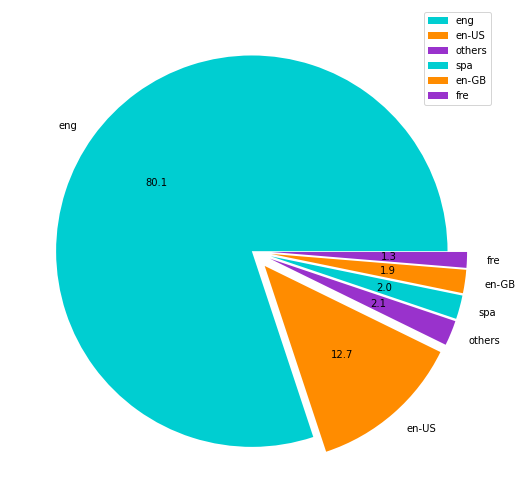

In [414]:
lang_data1.plot.pie(subplots=True,
                    colors=["darkturquoise", "darkorange", "darkorchid"],
                    explode=(0, 0.1, 0.1, 0.1, 0.1, 0.1),
                    autopct="%.1f",
                    figsize=(9, 9));

Как мы можем видеть из отображенной диаграммы, английский язык встречается в данном датасете в несколько тысяч раз чаще, чем остальные языки. Поэтому представим данные в виде круговой диаграммы со следующими атрибутами: English и Not English.

In [415]:
eng_df = df.loc[(df["language_code"]=="eng") | (df["language_code"]=="en-US") | (df["language_code"]=="en-GB") | (df["language_code"]=="en-CA")]
eng_num = eng_df.shape[0]
eng_percent = eng_num / df.shape[0] * 100
# print(eng_num, eng_percent, sep="\n")
noteng_df = df.loc[(df["language_code"]!="eng") & (df["language_code"]!="en-US") & (df["language_code"]!="en-GB") & (df["language_code"]!="en-CA")]
noteng_num = noteng_df.shape[0]
noteng_percent = noteng_num / df.shape[0] * 100
# print(noteng_num, noteng_percent, sep="\n")

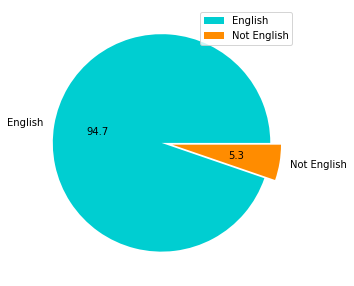

In [416]:
lang_pie = pd.DataFrame({"": [eng_num, noteng_num]},
                       index=["English", "Not English"])
lang_pie.plot.pie(y="",
                 colors=["darkturquoise", "darkorange"],
                 explode=[0, 0.1],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

In [417]:
rating_eng_data = {rating: eng_df["average_rating"].to_list().count(rating) for rating in set(eng_df["average_rating"])}
# rating_eng_data

In [418]:
rating_eng_df = pd.DataFrame.from_dict(data=rating_eng_data, orient="index", columns=["Rating for English books"]).sort_index()
# rating_eng_df.head()

In [419]:
rating_noteng_data = {rating: noteng_df["average_rating"].to_list().count(rating) for rating in set(noteng_df["average_rating"])}
# rating_noteng_data

In [420]:
rating_noteng_df = pd.DataFrame.from_dict(data=rating_noteng_data, orient="index", columns=["Rating for NOT English books"]).sort_index()
# rating_noteng_df.head()

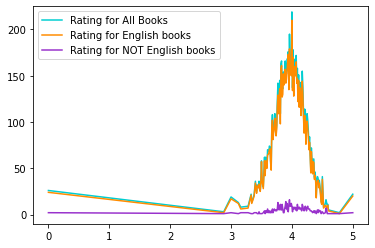

In [421]:
rating_all = rating_df.merge(rating_eng_df, left_index=True, right_index=True)
rating_all = rating_all.merge(rating_noteng_df, left_index=True, right_index=True)
rating_all.plot(color = ['darkturquoise', 'darkorange', 'darkorchid'], ylim=(-10, 225));

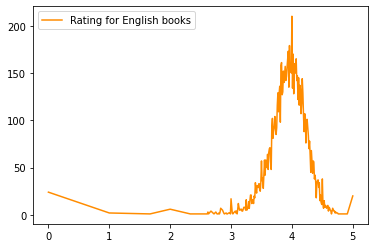

In [422]:
rating_eng_df.plot(color = ['darkorange']);

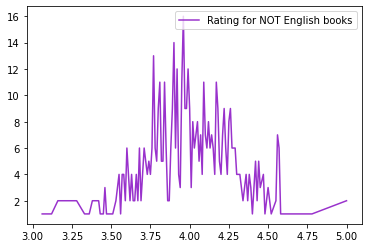

In [423]:
noteng_df = noteng_df.loc[noteng_df["average_rating"] > 3]
rating_noteng_data = {rating: noteng_df["average_rating"].to_list().count(rating) for rating in set(noteng_df["average_rating"])}
rating_noteng_df = pd.DataFrame.from_dict(data=rating_noteng_data, orient="index", columns=["Rating for NOT English books"]).sort_index()
rating_noteng_df.plot(color = ['darkorchid']);

Как мы можем видеть, графики абсолютно идентичные. Следовательно, книги написанные не на английском явлюябтся шумом и не играют важную роль. Это можно проверить по другим критериям.

Рассмотрим, каково будет распределение по авторам, если учитывать только английские книги

In [424]:
title_lang = df
bookID = title_lang.pop("bookID")
authors = title_lang.pop("authors")
average_rating = title_lang.pop("average_rating")
isbn = title_lang.pop("isbn")
isbn13 = title_lang.pop("isbn13")
num_pages = title_lang.pop("num_pages")
ratings_count = title_lang.pop("ratings_count")
text_reviews_count = title_lang.pop("text_reviews_count")
publication_date = title_lang.pop("publication_date")
publisher = title_lang.pop("publisher;;;")

In [425]:
title_lang

,title,language_code
0,Harry Potter and the Half-Blood Prince (Harry ...,eng
1,Harry Potter and the Order of the Phoenix (Har...,eng
2,Harry Potter and the Chamber of Secrets (Harry...,eng
3,Harry Potter and the Prisoner of Azkaban (Harr...,eng
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,eng
...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,eng
11123,You Bright and Risen Angels,eng
11124,The Ice-Shirt (Seven Dreams #1),eng
11125,Poor People,eng


In [426]:
title_list = []
for title in df["title"]:
    title_list.append(len(title.split()))
# title_list
words = pd.DataFrame(title_list, columns=["Words"])

In [427]:
title_lang = title_lang.merge(words, left_index=True, right_index=True)

In [428]:
eng_df = title_lang.loc[(df["language_code"]=="eng") | (df["language_code"]=="en-US") | (df["language_code"]=="en-GB") | (df["language_code"]!="en-CA")]
eng_df = eng_df.reset_index(drop=True)
# eng_df

In [429]:
total = 0
for a in eng_df["Words"]:
    total = total + a
print(total)
eng = total/eng_df.shape[0]
# eng

66285


In [430]:
noteng_df = title_lang.loc[(df["language_code"]!="eng") & (df["language_code"]!="en-US") & (df["language_code"]!="en-GB") & (df["language_code"]!="en-CA")]
noteng_df = noteng_df.reset_index(drop=True)
# noteng_df

In [431]:
noteng_data = {name: noteng_df["language_code"].to_list().count(name) for name in noteng_df["language_code"].unique()}
lang_stat = {}
for key in noteng_data.keys():
    if noteng_data[key] > 1:
        lang_stat[key] = noteng_data[key]
lang_data1 = pd.DataFrame.from_dict(lang_stat, orient='index', columns=["Times"])
lang_data1.sort_values(by=['Times'], ascending=False)

,Times
spa,218
fre,144
ger,99
jpn,46
mul,19
zho,14
grc,11
por,10
ita,5
enm,3


In [432]:
spa_df = title_lang.loc[(df["language_code"]=="spa")]
total = 0
for a in spa_df["Words"]:
    total = total + a
print(total)
spa = total/spa_df.shape[0]
spa


1091


5.004587155963303

In [433]:
fre_df = title_lang.loc[(df["language_code"]=="fre")]
total = 0
for a in fre_df["Words"]:
    total = total + a
print(total)
fre = total/fre_df.shape[0]
fre

700


4.861111111111111

In [434]:
ger_df = title_lang.loc[(df["language_code"]=="ger")]
total = 0
for a in ger_df["Words"]:
    total = total + a
print(total)
ger = total/ger_df.shape[0]
ger

473


4.777777777777778

In [435]:
jpn_df = title_lang.loc[(df["language_code"]=="jpn")]
total = 0
for a in jpn_df["Words"]:
    total = total + a
print(total)
jpn = total/jpn_df.shape[0]
jpn

149


3.239130434782609

In [436]:
mul_df = title_lang.loc[(df["language_code"]=="mul")]
total = 0
for a in mul_df["Words"]:
    total = total + a
print(total)
mul = total/mul_df.shape[0]
mul

119


6.2631578947368425

In [437]:
zho_df = title_lang.loc[(df["language_code"]=="zho")]
total = 0
for a in zho_df["Words"]:
    total = total + a
print(total)
zho = total/zho_df.shape[0]
zho

28


2.0

In [438]:
grc_df = title_lang.loc[(df["language_code"]=="grc")]
total = 0
for a in grc_df["Words"]:
    total = total + a
print(total)
grc = total/grc_df.shape[0]
grc

72


6.545454545454546

In [439]:
por_df = title_lang.loc[(df["language_code"]=="por")]
total = 0
for a in por_df["Words"]:
    total = total + a
print(total)
por = total/por_df.shape[0]
por

69


6.9

In [440]:
ita_df = title_lang.loc[(df["language_code"]=="ita")]
total = 0
for a in ita_df["Words"]:
    total = total + a
print(total)
ita = total/ita_df.shape[0]
ita

16


3.2

In [441]:
rus_df = title_lang.loc[(df["language_code"]=="rus")]
total = 0
for a in rus_df["Words"]:
    total = total + a
print(total)
rus = total/rus_df.shape[0]
rus

9


4.5

In [442]:
lang = {'English': eng, 'Spanish': spa, 'French': fre, 'German': ger, 'Japanese': jpn, 'Multiple': mul, 'Chinese': zho, 'Greek': grc, 'Portuguese': por, 'Italian': ita, 'Russian': rus}
lang

{'English': 5.960881294964029,
 'Spanish': 5.004587155963303,
 'French': 4.861111111111111,
 'German': 4.777777777777778,
 'Japanese': 3.239130434782609,
 'Multiple': 6.2631578947368425,
 'Chinese': 2.0,
 'Greek': 6.545454545454546,
 'Portuguese': 6.9,
 'Italian': 3.2,
 'Russian': 4.5}

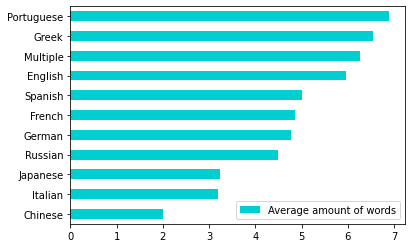

In [443]:
lang_data = pd.DataFrame.from_dict(lang, orient='index', columns=["Average amount of words"]).sort_values(by=['Average amount of words'], ascending=True)
lang_data.plot.barh(color = 'darkturquoise');

Много ли слов в названии книг в разных языках

In [444]:
df = pd.read_csv("books.csv")
page_date = df
bookID = page_date.pop("bookID")
title = page_date.pop("title")
authors = page_date.pop("authors")
language_code = page_date.pop("language_code")
average_rating = page_date.pop("average_rating")
isbn = page_date.pop("isbn")
isbn13 = page_date.pop("isbn13")
ratings_count = page_date.pop("ratings_count")
text_reviews_count = page_date.pop("text_reviews_count")
publisher = page_date.pop("publisher;;;")
page_date

,num_pages,publication_date
0,652,9/16/2006
1,870,9/1/2004
2,352,11/1/2003
3,435,5/1/2004
4,2690,9/13/2004
...,...,...
11122,512,12/21/2004
11123,635,12/1/1988
11124,415,8/1/1993
11125,434,2/27/2007


In [445]:
page_stat = {
    "min": page_date["num_pages"].min(),
    "max": page_date["num_pages"].max()
    }
print(page_stat)
df = pd.read_csv("books.csv")

a = df.loc[(df["num_pages"]>3000)]
a

{'min': 0, 'max': 6576}


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic;;;
6500,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company;;;
6805,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books;;;
6825,25709,Summa Theologica 5 Vols,Thomas Aquinas,4.12,0870610635,9780870610639,eng,3020,2734,84,1/1/1981,Christian Classics;;;
10910,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,0701125594,9780701125592,eng,3400,6,1,3/5/1981,Chatto & Windus;;;


In [446]:
page_date['publication_date'] = pd.to_datetime(page_date['publication_date'], errors='coerce')
page_date['year']= page_date['publication_date'].dt.year
page_date

,num_pages,publication_date,year
0,652,2006-09-16,2006.0
1,870,2004-09-01,2004.0
2,352,2003-11-01,2003.0
3,435,2004-05-01,2004.0
4,2690,2004-09-13,2004.0
...,...,...,...
11122,512,2004-12-21,2004.0
11123,635,1988-12-01,1988.0
11124,415,1993-08-01,1993.0
11125,434,2007-02-27,2007.0


{'min': 1900.0}


In [447]:
df_1900s = page_date.loc[(page_date["year"] >= 1900) & (page_date["year"] < 1910)]
# df_1900s
total = 0
for a in df_1900s["num_pages"]:
    total = total + a
print(total)
p_1900s = total/df_1900s.shape[0]
p_1900s

144


144.0

In [448]:
df_1910s = page_date.loc[(page_date["year"] >= 1910) & (page_date["year"] < 1920)]
# df_1910s
total = 0
for a in df_1910s["num_pages"]:
    total = total + a
print(total)
p_1910s = total/df_1910s.shape[0]
p_1910s

1328


442.6666666666667

In [449]:
df_1920s = page_date.loc[(page_date["year"] >= 1920) & (page_date["year"] < 1930)]
# df_1920s
total = 0
for a in df_1920s["num_pages"]:
    total = total + a
print(total)
p_1920s = total/df_1920s.shape[0]
p_1920s

3442


430.25

In [450]:
df_1930s = page_date.loc[(page_date["year"] >= 1930) & (page_date["year"] < 1940)]
# df_1930s
total = 0
for a in df_1930s["num_pages"]:
    total = total + a
print(total)
p_1930s = total/df_1930s.shape[0]
p_1930s

504


252.0

In [451]:
df_1940s = page_date.loc[(page_date["year"] >= 1940) & (page_date["year"] < 1950)]
# df_1940s
total = 0
for a in df_1940s["num_pages"]:
    total = total + a
print(total)
p_1940s = total/df_1940s.shape[0]
p_1940s

1246


178.0

In [452]:
df_1950s = page_date.loc[(page_date["year"] >= 1950) & (page_date["year"] < 1960)]
# df_1950s
total = 0
for a in df_1950s["num_pages"]:
    total = total + a
print(total)
p_1950s = total/df_1950s.shape[0]
p_1950s

8101


279.3448275862069

In [453]:
df_1960s = page_date.loc[(page_date["year"] >= 1960) & (page_date["year"] < 1970)]
# df_1960s
total = 0
for a in df_1960s["num_pages"]:
    total = total + a
print(total)
p_1960s = total/df_1960s.shape[0]
p_1960s

21593


295.7945205479452

In [454]:
df_1970s = page_date.loc[(page_date["year"] >= 1970) & (page_date["year"] < 1980)]
# df_1970s
total = 0
for a in df_1970s["num_pages"]:
    total = total + a
print(total)
p_1970s = total/df_1970s.shape[0]
p_1970s

64306


315.22549019607845

In [455]:
df_1980s = page_date.loc[(page_date["year"] >= 1980) & (page_date["year"] < 1990)]
# df_1980s
total = 0
for a in df_1980s["num_pages"]:
    total = total + a
print(total)
p_1980s = total/df_1980s.shape[0]
p_1980s

227438


362.74003189792666

In [456]:
df_1990s = page_date.loc[(page_date["year"] >= 1990) & (page_date["year"] < 2000)]
# df_1990s
total = 0
for a in df_1990s["num_pages"]:
    total = total + a
print(total)
p_1990s = total/df_1990s.shape[0]
p_1990s

858653


347.3515372168285

In [457]:
df_2000s = page_date.loc[(page_date["year"] >= 2000) & (page_date["year"] < 2010)]
# df_2000s
total = 0
for a in df_2000s["num_pages"]:
    total = total + a
print(total)
p_2000s = total/df_2000s.shape[0]
p_2000s

2514575


332.70375760783276

In [458]:
df_2010s = page_date.loc[(page_date["year"] >= 2010) & (page_date["year"] < 2020)]
# df_2010s
total = 0
for a in df_2010s["num_pages"]:
    total = total + a
print(total)
p_2010s = total/df_2010s.shape[0]
p_2010s

39818


284.4142857142857

In [459]:
df_2020s = page_date.loc[(page_date["year"] >= 2020) & (page_date["year"] < 2030)]
# df_2020s
total = 0
for a in df_2020s["num_pages"]:
    total = total + a
print(total)
p_2020s = total/df_2020s.shape[0]
p_2020s

360


360.0

In [460]:
page = {'1900s': p_1900s, '1910s': p_1910s, '1920s': p_1920s, '1930s': p_1930s, '1940s': p_1940s, '1950s': p_1950s, '1960s': p_1960s, '1970s': p_1970s, '1980s': p_1980s, '1990s': p_1990s, '2000s': p_2000s, '2010s': p_2010s, '2020s': p_2020s}
page

{'1900s': 144.0,
 '1910s': 442.6666666666667,
 '1920s': 430.25,
 '1930s': 252.0,
 '1940s': 178.0,
 '1950s': 279.3448275862069,
 '1960s': 295.7945205479452,
 '1970s': 315.22549019607845,
 '1980s': 362.74003189792666,
 '1990s': 347.3515372168285,
 '2000s': 332.70375760783276,
 '2010s': 284.4142857142857,
 '2020s': 360.0}

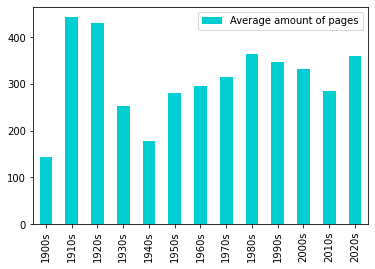

In [461]:
page_data = pd.DataFrame.from_dict(page, orient='index', columns=["Average amount of pages"])
page_data.plot.bar(color = 'darkturquoise');